In [46]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('Sunspots.csv')
data.index.freqs='MS'
data.drop(labels = ['Unnamed: 0'],axis = 1,inplace =True)
data.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [48]:
data.columns

Index(['Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

In [49]:
data.describe()

,Monthly Mean Total Sunspot Number
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


In [50]:
data['Date']=pd.to_datetime(data['Date']) #Converting date into datetime object

In [51]:
data_new = data.set_index(data['Date']) #Setting the date column as index
data_new1 = data_new.drop(labels =['Date'],axis = 1) #Deleting the data column

<AxesSubplot:xlabel='Date'>

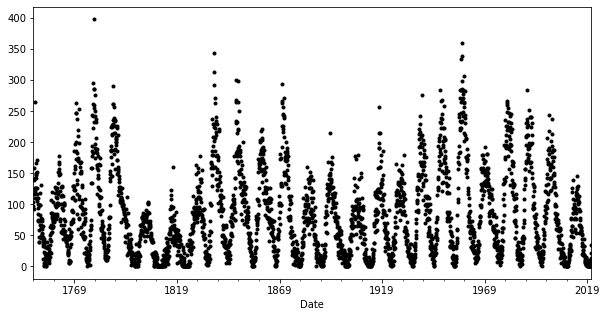

In [52]:
fig = plt.figure(figsize = (10,5))
data_new1['Monthly Mean Total Sunspot Number'].plot(style = 'k.')

<AxesSubplot:xlabel='Date'>

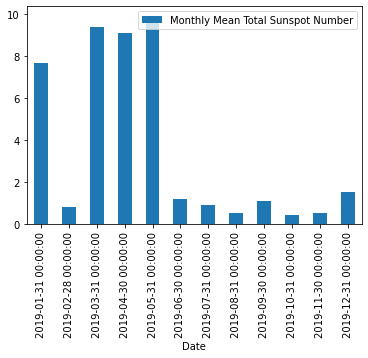

In [53]:
data_new1['2019'].resample('M').mean().plot(kind='bar')

In [54]:
data_q = data_new1.resample('q').mean()
data_q.head()

,Monthly Mean Total Sunspot Number
Date,
1749-03-31,105.900000
1749-06-30,124.566667
1749-09-30,131.666667
1749-12-31,177.366667
1750-03-31,132.466667


<AxesSubplot:xlabel='Date'>

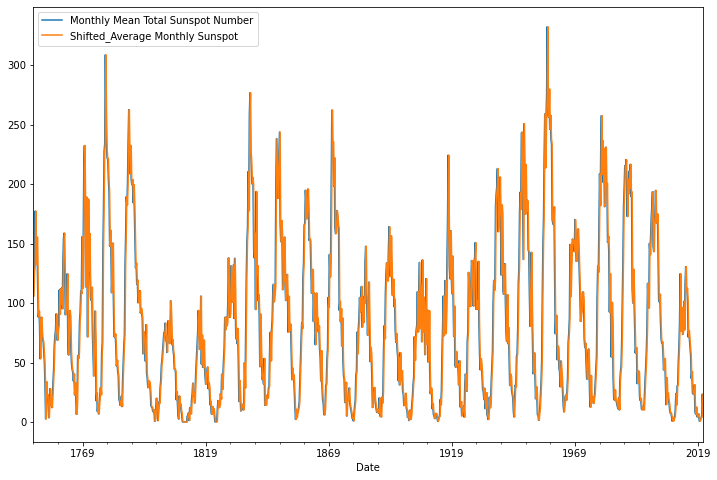

In [55]:
base_data = data_q.copy()
base_data['Shifted_Average Monthly Sunspot'] = base_data['Monthly Mean Total Sunspot Number'].shift(1)
base_data[['Monthly Mean Total Sunspot Number','Shifted_Average Monthly Sunspot']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

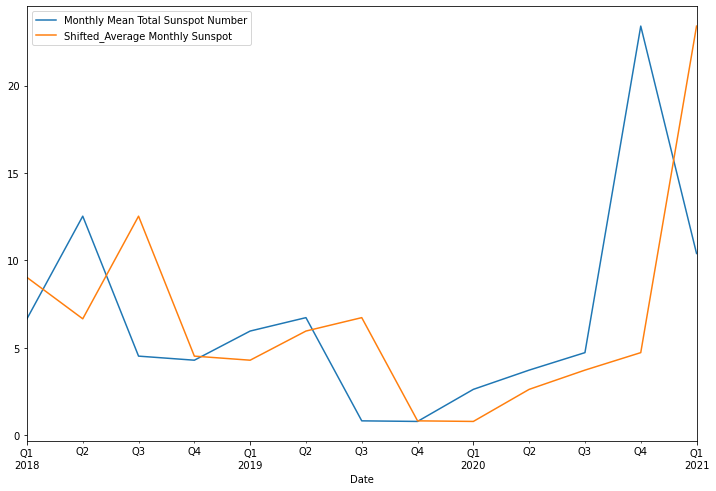

In [56]:
#Actual value vs Modelled Value
base_data[['Monthly Mean Total Sunspot Number','Shifted_Average Monthly Sunspot']]['2018':].plot(figsize=(12,8))

ARIMA MODEL

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_q,order=(2,0,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 1089
Model:                                ARIMA(2, 0, 2)   Log Likelihood               -4975.741
Date:                               Tue, 02 Apr 2024   AIC                           9963.482
Time:                                       22:49:39   BIC                           9993.440
Sample:                                   03-31-1749   HQIC                          9974.821
                                        - 03-31-2021                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7351      0.001   1.53e+05      0.000      81.734      81.736
ar.L1          1.8110      0.037     48.567      0.000       1.738       1.884
ar.L2         -0.8110      0.037    -21.750      0.000      -0.884      -0.738
ma.L1         -1.0794      0.039    -27.951      0.000      -1.155      -1.004
ma.L2          0.3493      0.020     17.545      0.000       0.310       0.388
sigma2       540.0942     16.993     31.783      0.000     506.788     573.401
===================================================================================
Ljung-Box (L1) (Q):                   2.82   Jarque-Bera (JB):               150.86
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.12
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.94e+19. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

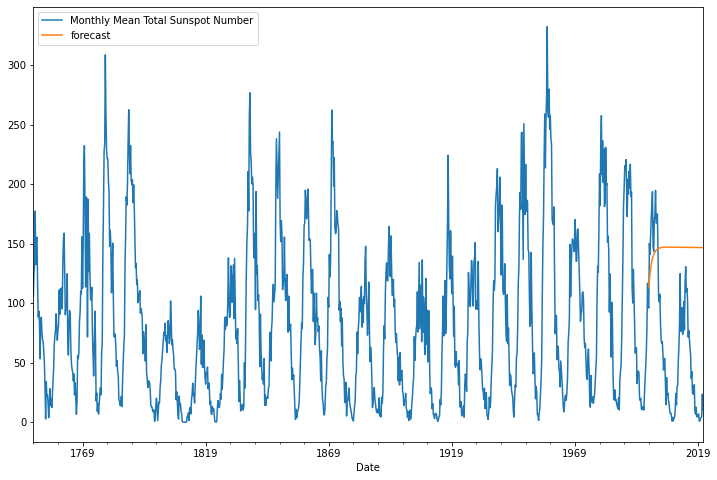

In [58]:
data_q['forecast']=model_fit.predict(start=1000,end=1500,dynamic=True)
data_q[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

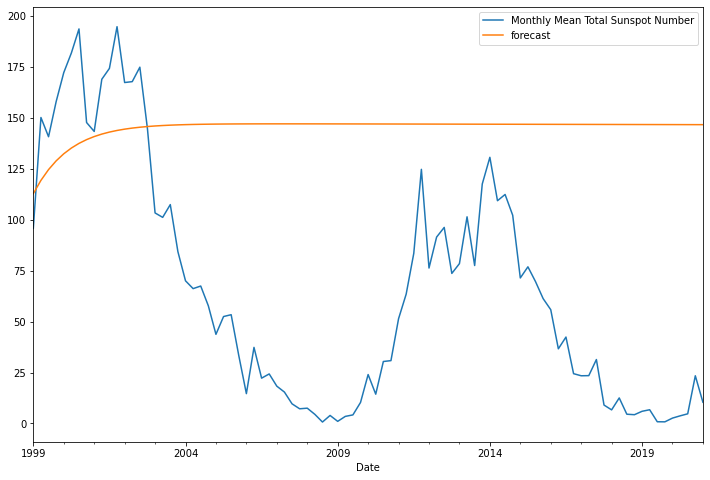

In [59]:
#Actual value vs Modelled Value
pred = data_q[data_q.forecast.notna()]
pred[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

Seasonal ARIMA Model

In [61]:
import statsmodels.api as sm  # Importing statsmodels with the alias 'sm'
model=sm.tsa.statespace.SARIMAX(data_q['Monthly Mean Total Sunspot Number'],order=(2, 0, 2),seasonal_order=(2,0,2,6)) #seasonal_order is (p,d,q,seasonal_value) In this case I'm considering it as 6
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 1089
Model:                 SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -4955.723
Date:                               Tue, 02 Apr 2024   AIC                           9929.446
Time:                                       22:50:33   BIC                           9974.383
Sample:                                   03-31-1749   HQIC                          9946.455
                                        - 03-31-2021                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7893      0.080     22.447      0.000       1.633       1.946
ar.L2         -0.7912      0.080     -9.929      0.000      -0.947      -0.635
ma.L1         -1.1008      0.077    -14.272      0.000      -1.252      -0.950
ma.L2          0.3253      0.025     13.166      0.000       0.277       0.374
ar.S.L6        1.2698      0.034     37.844      0.000       1.204       1.336
ar.S.L12      -0.9260      0.034    -27.288      0.000      -0.993      -0.860
ma.S.L6       -1.2745      0.042    -30.148      0.000      -1.357      -1.192
ma.S.L12       0.8748      0.043     20.443      0.000       0.791       0.959
sigma2       509.8732     15.879     32.110      0.000     478.751     540.996
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):               135.27
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.12
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

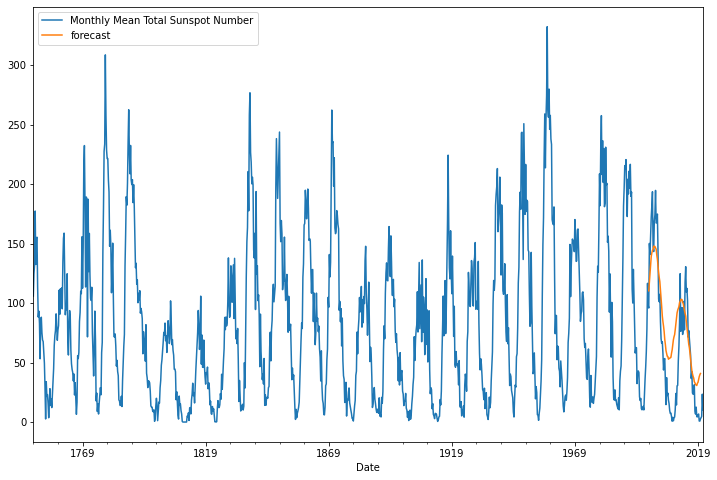

In [62]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

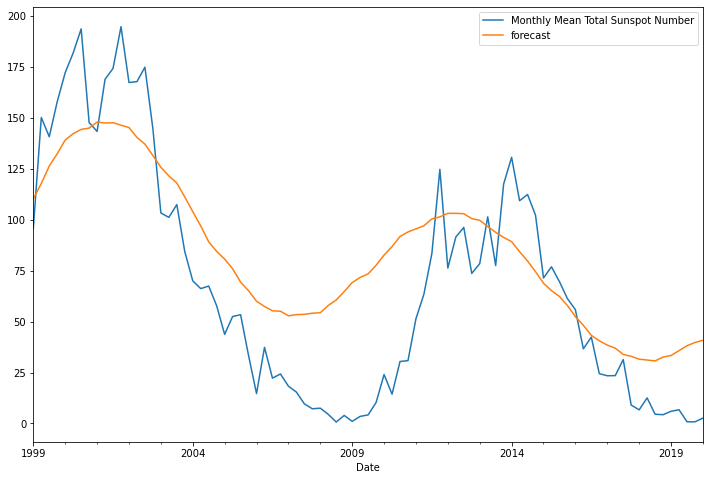

In [63]:
pred = data_q[data_q.forecast.notna()]
pred[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))